In [1]:
import sys
sys.path.append("../src")

In [2]:
from model import UnetModel
from skimage.io import imshow
%matplotlib inline

Using TensorFlow backend.


In [3]:
n_fold = 1
batch_size = 8
batches = 400

In [4]:
for fold_num in range(0):
    model = UnetModel(f"unet__sgd_{fold_num}")
    
    learn_rates = [0.0001, 0.00001, 0.000001]
    epochs_list = [50, 50, 50]

    for lr, epochs in zip(learn_rates, epochs_list):
        model.fit(lr, epochs, fold_num, opt="SGD")

In [5]:
model = UnetModel("prediction")
model.unet.load_weights("./unet_0.best.weights.h5py")
from generator import train_generator
batch = next(train_generator(n_fold=0))

../src/unet.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  conv = Convolution2D(size, 3, 3, border_mode='same')(x)
../src/unet.py:15: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=1)`
  conv = BatchNormalization(mode=0, axis=1)(conv)
../src/unet.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  conv = Convolution2D(size, 3, 3, border_mode='same')(conv)
../src/unet.py:19: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=1)`
  conv = BatchNormalization(mode=0, axis=1)(conv)
../src/unet.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  conv = Convolution2D(size, 3, 3, border_mode='same')(x)
../src/unet.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  conv = Convolution2D(si

/home/westside/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


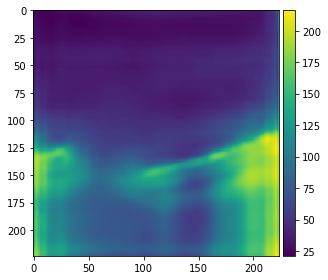

In [6]:
imshow(model.unet.predict(batch[0])[7].squeeze() * 255)

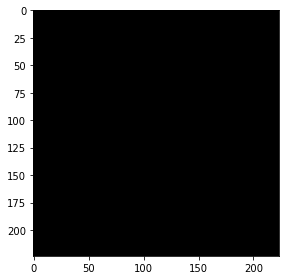

In [7]:
imshow(batch[1][7].squeeze())

In [8]:
import h5py
num = 51
train = h5py.File("../data/train.h5")
img = train["x_data"][-num]
mask = train["y_data"][-num]

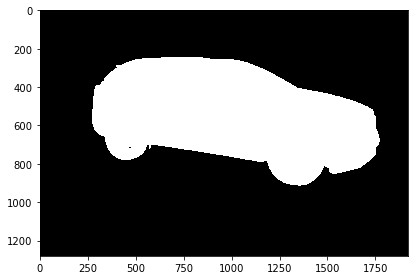

In [9]:
imshow(mask.squeeze())

In [10]:
from predictor import Predictor
predictor = Predictor(model.unet)
pred = predictor.predict_by_crops(img=img)

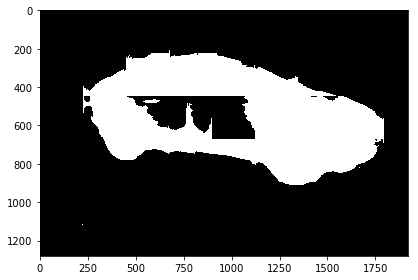

In [11]:
imshow(pred > 0.974)

In [12]:
from dice import dice_coef
import numpy as np

In [13]:
for i in np.arange(0.95, 1.0, 0.001):
    score = np.sum((mask.squeeze().astype('bool') == (pred > i)).flatten()) / pred.flatten().shape[0]
    print(score, i)

0.954378340068 0.95
0.95432049987 0.951
0.954223556439 0.952
0.954043925965 0.953
0.95383456074 0.954
0.953581611705 0.955
0.953369395203 0.956
0.953154327424 0.957
0.952887529327 0.958
0.952590996481 0.959
0.952210554614 0.96
0.951795082769 0.961
0.951301404458 0.962
0.950827277763 0.963
0.950309974583 0.964
0.949769861184 0.965
0.949279441475 0.966
0.948760508994 0.967
0.948236688608 0.968
0.947711646246 0.969
0.947180086679 0.97
0.946660339546 0.971
0.946053832117 0.972
0.945387040537 0.973
0.944654262252 0.974
0.943918225365 0.975
0.943158563608 0.976
0.942475479015 0.977
0.941787913843 0.978
0.941089350886 0.979
0.940376938869 0.98
0.939700371481 0.981
0.938924009385 0.982
0.93810732208 0.983
0.937254790146 0.984
0.936169675443 0.985
0.934637317518 0.986
0.932517596455 0.987
0.927727450469 0.988
0.919534508603 0.989
0.905777909932 0.99
0.880610906543 0.991
0.832915553311 0.992
0.755879741267 0.993
0.729069994786 0.994
0.726926241528 0.995
0.726811375782 0.996
0.726811375782 0.997


In [ ]:
from rle_encoder import rle_encode
rle_encode(pred.squeeze() > 0.97)

'399617 4 401535 4 403453 4 405371 5 407289 5 409207 5 411125 5 413043 5 414961 5 416879 5 418797 5 420715 5 422187 1 422633 5 424103 1 424105 2 424551 5 426021 5 426469 6 426478 3 427939 6 428387 6 428396 3 430102 1 430197 113 430333 2 430374 10 430395 35 430431 146 432019 3 432113 115 432248 252 433937 2 434034 112 434239 48 434289 104 434395 17 435855 2 435953 111 436159 47 436207 105 436313 17 437772 3 437870 112 438073 157 438231 18 439690 4 439787 113 439965 9 439984 184 441607 5 441705 114 441839 7 441879 207 443525 5 443622 115 443755 21 443789 1 443793 212 445442 5 445540 115 445659 2 445673 249 447360 5 447458 115 447577 3 447590 250 449277 5 449376 115 449495 3 449507 234 449742 16 451194 6 451293 116 451413 5 451423 236 451660 17 453097 1 453112 6 453209 118 453330 269 455015 1 455029 8 455038 1 455126 119 455248 274 456933 1 456935 1 456946 19 457043 121 457166 278 458851 1 458853 3 458863 21 458960 122 459083 281 460769 1 460771 3 460780 22 460877 408 462687 1 462689 3 46

In [ ]:
predictor.create_crop_submission()

471it [07:39,  1.03it/s]